<a href="https://colab.research.google.com/github/HONG-JU-OH/-Sejong-Chungnam-Daejeon-traffic-accident-data-analysis/blob/main/%EC%84%B8%EC%A2%85%2C%EC%B6%A9%EB%82%A8%2C%EB%8C%80%EC%A0%84_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 분류하고 정제하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns",30)

In [ ]:
plt.rc('font', family='Malgun Gothic')

In [ ]:
df=pd.read_csv("12_19_death_1.csv")
df.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24
0,2012,2012010108,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268,NaN,NaN
1,2012,2012010104,야간,일,1,2,1,0,0,충남,서산시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,911131,1861851,126.504460,36.750581,NaN,NaN
2,2012,2012011212,주간,목,1,1,0,0,0,충남,천안시,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,966331,1857321,127.123003,36.713312,NaN,NaN
3,2012,2012010302,야간,화,1,1,0,0,0,충남,태안군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,894123,1846409,126.316100,36.609656,NaN,NaN
4,2012,2012010507,주간,목,1,1,0,0,0,충남,천안시,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,981851,1862244,127.296666,36.758114,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           3797 non-null   int64  
 1   발생년월일시        3797 non-null   int64  
 2   주야            3797 non-null   object 
 3   요일            3797 non-null   object 
 4   사망자수          3797 non-null   int64  
 5   사상자수          3797 non-null   int64  
 6   중상자수          3797 non-null   int64  
 7   경상자수          3797 non-null   int64  
 8   부상신고자수        3797 non-null   int64  
 9   발생지시도         3797 non-null   object 
 10  발생지시군구        3797 non-null   object 
 11  사고유형_대분류      3797 non-null   object 
 12  사고유형_중분류      3797 non-null   object 
 13  사고유형          3797 non-null   object 
 14  법규위반          3797 non-null   object 
 15  도로형태_대분류      3797 non-null   object 
 16  도로형태          3797 non-null   object 
 17  당사자종별_1당_대분류  3797 non-null   object 
 18  당사자종별_2당_대분류  3797 non-null 

In [ ]:
df["발생년월일시"]=pd.to_datetime(df["발생년월일시"], format="%Y%m%d%H") #발생년월일시가 정수형이여서 형변환
df.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24
0,2012,2012-01-01 08:00:00,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268,NaN,NaN
1,2012,2012-01-01 04:00:00,야간,일,1,2,1,0,0,충남,서산시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,911131,1861851,126.504460,36.750581,NaN,NaN
2,2012,2012-01-12 12:00:00,주간,목,1,1,0,0,0,충남,천안시,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,966331,1857321,127.123003,36.713312,NaN,NaN
3,2012,2012-01-03 02:00:00,야간,화,1,1,0,0,0,충남,태안군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,894123,1846409,126.316100,36.609656,NaN,NaN
4,2012,2012-01-05 07:00:00,주간,목,1,1,0,0,0,충남,천안시,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,981851,1862244,127.296666,36.758114,NaN,NaN


In [ ]:
df.info() # 날짜정보가 다시 수정된 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   발생년           3797 non-null   int64         
 1   발생년월일시        3797 non-null   datetime64[ns]
 2   주야            3797 non-null   object        
 3   요일            3797 non-null   object        
 4   사망자수          3797 non-null   int64         
 5   사상자수          3797 non-null   int64         
 6   중상자수          3797 non-null   int64         
 7   경상자수          3797 non-null   int64         
 8   부상신고자수        3797 non-null   int64         
 9   발생지시도         3797 non-null   object        
 10  발생지시군구        3797 non-null   object        
 11  사고유형_대분류      3797 non-null   object        
 12  사고유형_중분류      3797 non-null   object        
 13  사고유형          3797 non-null   object        
 14  법규위반          3797 non-null   object        
 15  도로형태_대분류      3797 non-null   object  

In [ ]:
df["발생월"]=df["발생년월일시"].dt.month #발생월 컬럼추가
df["발생시간"]=df["발생년월일시"].dt.hour #발생시간 컬럼추가
df.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
0,2012,2012-01-01 08:00:00,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268,NaN,NaN,1,8
1,2012,2012-01-01 04:00:00,야간,일,1,2,1,0,0,충남,서산시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,911131,1861851,126.504460,36.750581,NaN,NaN,1,4
2,2012,2012-01-12 12:00:00,주간,목,1,1,0,0,0,충남,천안시,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,966331,1857321,127.123003,36.713312,NaN,NaN,1,12
3,2012,2012-01-03 02:00:00,야간,화,1,1,0,0,0,충남,태안군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,894123,1846409,126.316100,36.609656,NaN,NaN,1,2
4,2012,2012-01-05 07:00:00,주간,목,1,1,0,0,0,충남,천안시,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,981851,1862244,127.296666,36.758114,NaN,NaN,1,7


# 2. 발생년, 요일, 사망자수에 따른 데이터 시각화

In [ ]:
df["발생년"].value_counts() #발생년도 컬럼의 값 개수 조회

2012    542
2014    506
2013    503
2016    491
2015    478
2018    451
2017    440
2019    386
Name: 발생년, dtype: int64

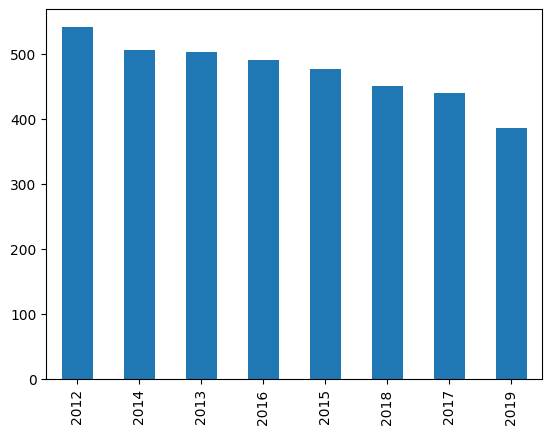

In [ ]:
df["발생년"].value_counts().plot(kind="bar") #발생년도 컬럼의 시각화
plt.show()

In [ ]:
df["요일"].value_counts() #요일별 사고건수

월    608
토    562
금    558
목    535
화    530
수    524
일    480
Name: 요일, dtype: int64

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*ar

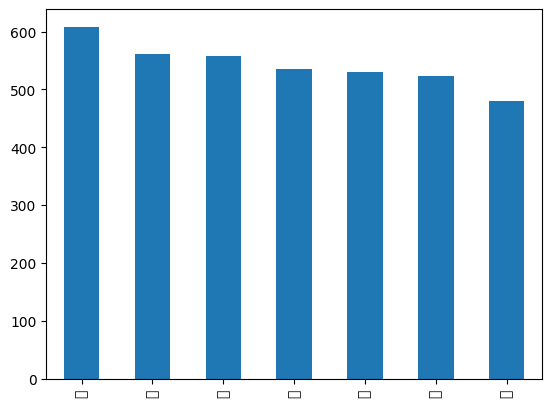

In [ ]:
df["요일"].value_counts().plot(kind="bar")

In [ ]:
df.groupby("발생년")["사망자수"] .sum() #연도별 사망자수 합계

발생년
2012    559
2013    531
2014    525
2015    498
2016    512
2017    455
2018    467
2019    400
Name: 사망자수, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


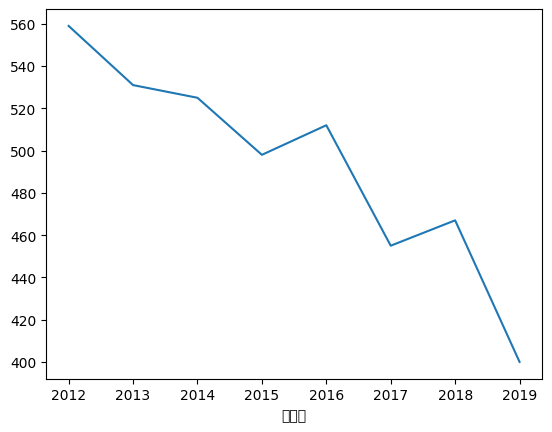

In [ ]:
df.groupby("발생년")["사망자수"] .sum().plot()
plt.show() # 발생년도별 사망자수 합계 시각화

In [ ]:
df.groupby("발생년")["사상자수"] .sum() #연도별 사상자수 집계

발생년
2012    900
2013    859
2014    774
2015    779
2016    781
2017    705
2018    702
2019    565
Name: 사상자수, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


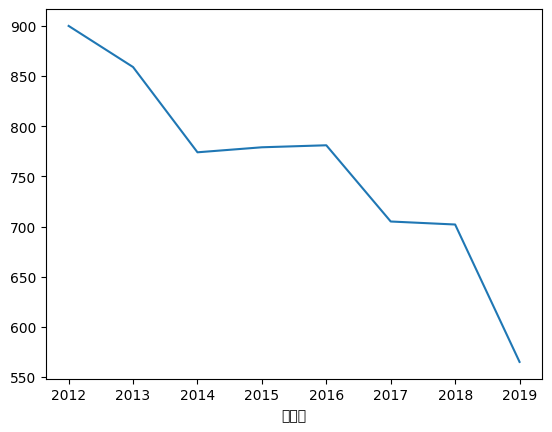

In [ ]:
df.groupby("발생년")["사상자수"] .sum().plot()
plt.show() #발생년도별 사상자수 합계 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

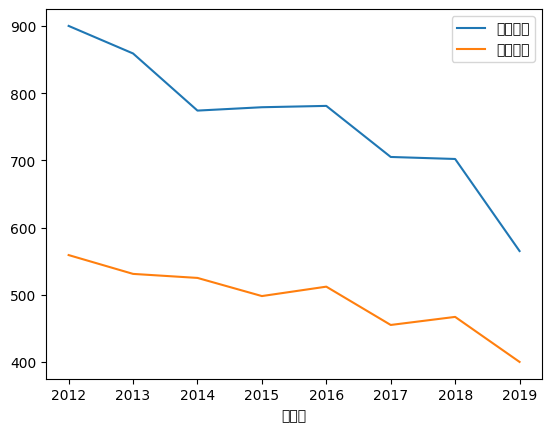

In [ ]:
df.groupby("발생년")["사상자수"].sum().plot(label="사상자수")
df.groupby("발생년")["사망자수"].sum().plot(label="사망자수")
plt.legend()
plt.show()

# 3. 데이터 정렬하기

In [ ]:
df.sort_values("사상자수",ascending=False).head() #사상자수로 정렬

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
2432,2016,2016-11-06 09:00:00,주간,일,4,44,22,17,1,대전,대덕구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,승합차,992831,1823258,127.420045,36.406800,NaN,NaN,11,9
748,2013,2013-11-10 11:00:00,주간,일,1,43,14,28,0,충남,천안시,차대차,추돌,진행중 추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승합차,970483,1866208,127.169152,36.793562,NaN,NaN,11,11
3703,2019,2019-06-18 00:00:00,야간,화,2,33,17,14,0,충남,아산시,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,화물차,승합차,963790,1870257,127.093941,36.829830,NaN,NaN,6,0
1772,2015,2015-04-18 13:00:00,주간,토,1,27,17,9,0,충남,당진시,차대차,측면충돌,측면충돌,과속,교차로,교차로내,승용차,승합차,921615,1886173,126.619380,36.970733,NaN,NaN,4,13
1027,2013,2013-11-27 17:00:00,주간,수,6,24,0,18,0,충남,천안시,차대차,기타,기타,중앙선 침범,단일로,기타단일로,승합차,화물차,969146,1871265,127.153961,36.839106,NaN,NaN,11,17


In [ ]:
df.sort_values("사망자수",ascending=False).head() #사망자수로 정렬

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
1027,2013,2013-11-27 17:00:00,주간,수,6,24,0,18,0,충남,천안시,차대차,기타,기타,중앙선 침범,단일로,기타단일로,승합차,화물차,969146,1871265,127.153961,36.839106,NaN,NaN,11,17
2432,2016,2016-11-06 09:00:00,주간,일,4,44,22,17,1,대전,대덕구,차대차,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,승합차,992831,1823258,127.420045,36.406800,NaN,NaN,11,9
1656,2015,2015-03-30 14:00:00,주간,월,4,5,1,0,0,충남,홍성군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,914746,1845362,126.546787,36.602286,NaN,NaN,3,14
1264,2014,2014-03-30 23:00:00,야간,일,4,4,0,0,0,충남,아산시,차량단독,공작물충돌,공작물충돌,과속,단일로,기타단일로,승용차,없음,951823,1875047,126.959444,36.872474,NaN,NaN,3,23
3054,2018,2018-04-14 13:00:00,주간,토,3,5,0,2,0,충남,예산군,차대차,측면충돌,측면충돌,중앙선 침범,교차로,교차로부근,승용차,승용차,934714,1837931,126.770657,36.536877,NaN,NaN,4,13


# 4. 피벗팅하여 데이터 시각화하기

In [ ]:
a=df.pivot_table(index="발생지시도",columns="발생년",values="사상자수",aggfunc="sum",fill_value=0) # 발생지시도와 발생년 컬럼을 피벗팅하여 사상자수의 합계 계산(행은 발생지시도, aggfunc= 집계함수)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPyt

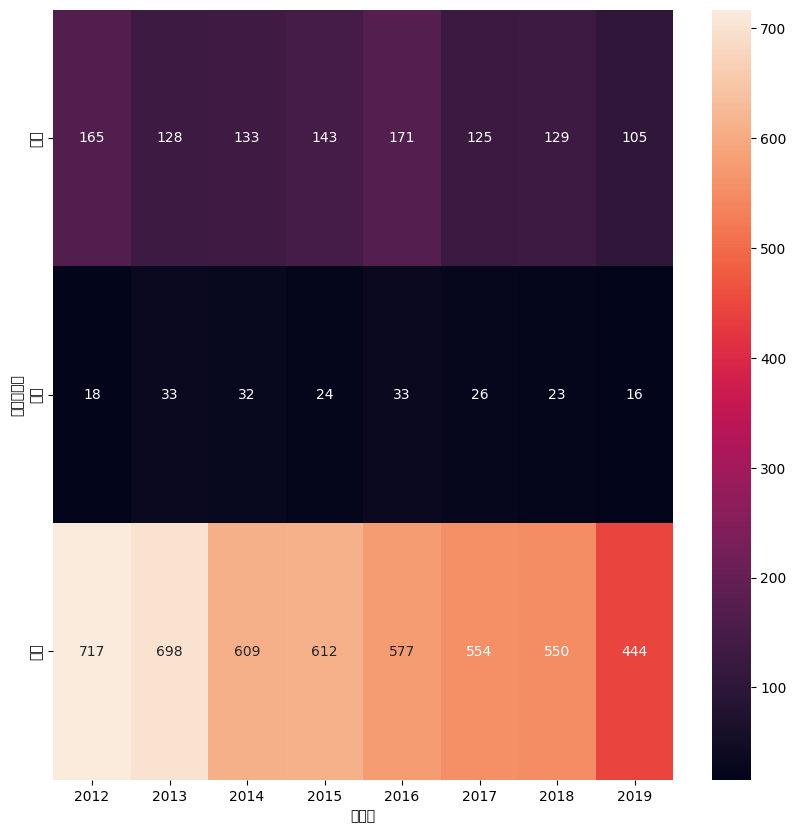

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(a,annot=True,fmt="d")
plt.show() # 색이 밝을수록 데이터가 많다(오른쪽)

# 5. 지역별 사상자수 시각화

In [ ]:
b=df.groupby(["발생지시도","발생년","발생월"])["사상자수"].sum()
b.head() #발생지도별 월별 사상자수를 집계

발생지시도  발생년   발생월
대전     2012  1      15
             2      12
             3       7
             4      12
             5      11
Name: 사상자수, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


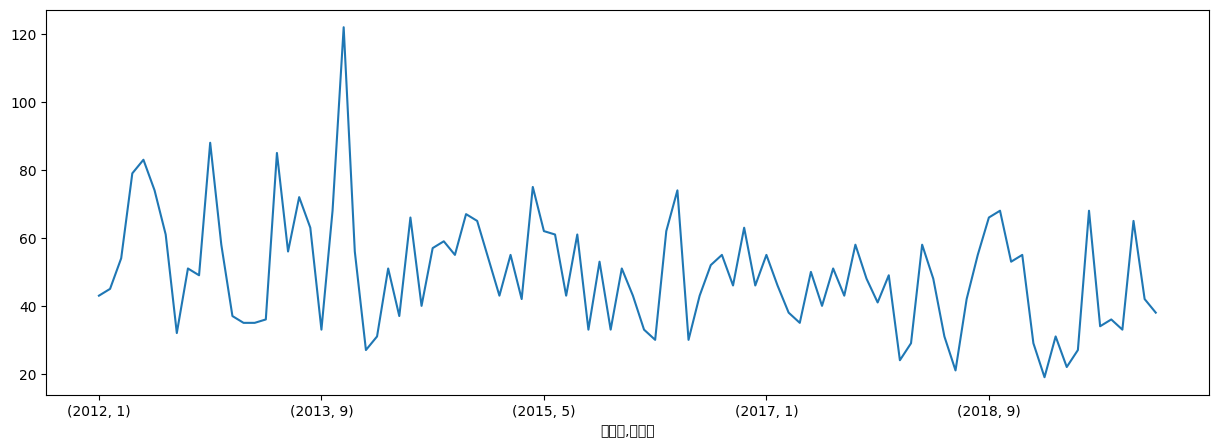

In [ ]:
plt.figure(figsize=(15,5))
b.loc["충남",:].plot()
plt.show() # 충남의 사상자수 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


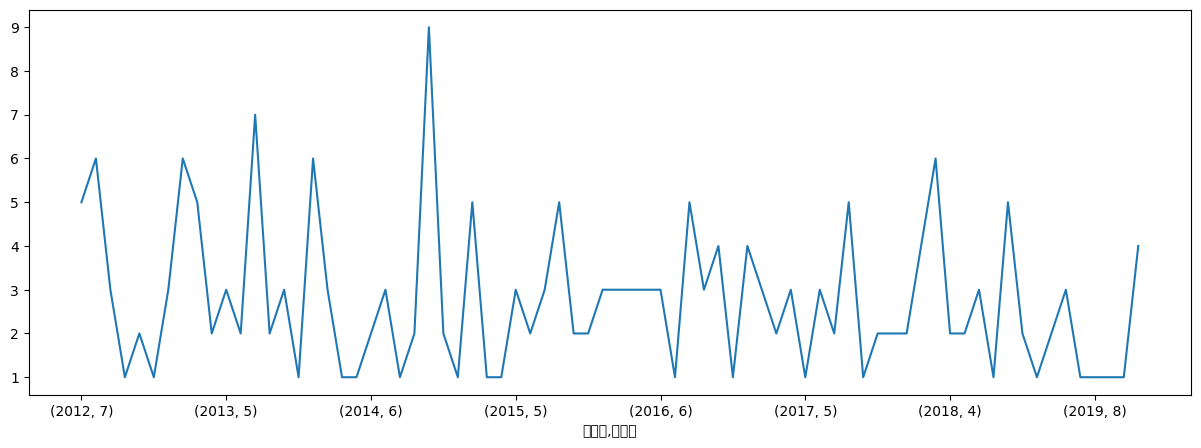

In [ ]:
plt.figure(figsize=(15,5))
b.loc["세종",:].plot()
plt.show() # 세종의 사상자수 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


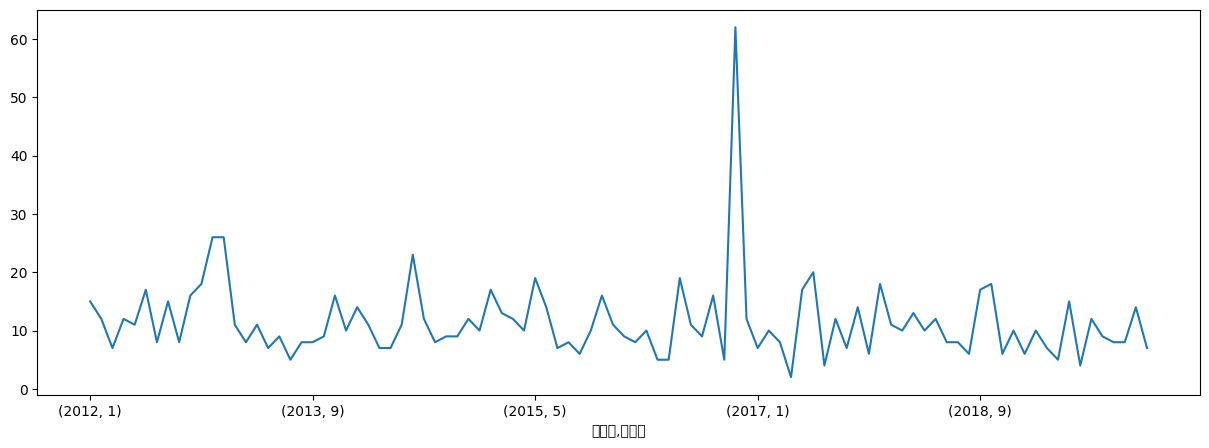

In [ ]:
plt.figure(figsize=(15,5))
b.loc["대전",:].plot()
plt.show() # 대전의 사상자수 시각화

# 6. 발생지시도와 발생월 컬럼을 피벗팅하여 사상자수 집계 후 시각화

In [ ]:
c=df.pivot_table(index=["발생년","발생월"], columns="발생지시도", values="사상자수", aggfunc="sum") #발생지시도와 발생월 컬럼을 피벗팅하여 사상자수를 집계

c

발생지시도       대전   세종    충남
발생년  발생월                 
2012 1    15.0  NaN  43.0
     2    12.0  NaN  45.0
     3     7.0  NaN  54.0
     4    12.0  NaN  79.0
     5    11.0  NaN  83.0
...        ...  ...   ...
2019 8     9.0  1.0  36.0
     9     8.0  1.0  33.0
     10    8.0  1.0  65.0
     11   14.0  4.0  42.0
     12    7.0  NaN  38.0

[96 rows x 3 columns]

<Figure size 1500x500 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

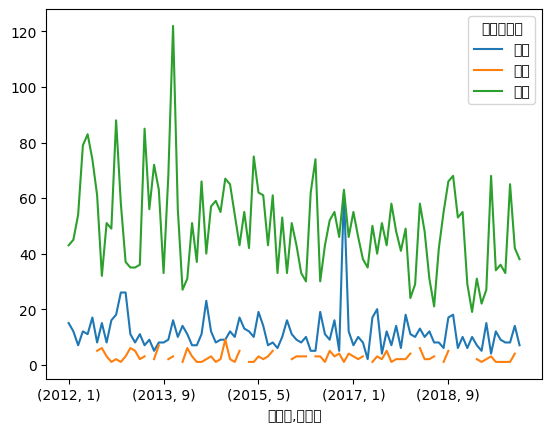

In [ ]:
plt.figure(figsize=(15,5)) #그래프의 크기지정
c.plot()
plt.show() #발생지시도와 발생월 컬럼을 피벗팅하여 사상자수를 집계 한것을 시각화

# 7. 사고유형별 사상자수, 사망자수, 중상자수, 경상자수 집계

In [ ]:
df.groupby("사고유형_대분류")[["사상자수","사망자수","중상자수","경상자수"]].sum() #사고유형별 사상자수, 사망자수, 중상자수, 경상자수 집계

,사상자수,사망자수,중상자수,경상자수
사고유형_대분류,,,,
차대사람,1490,1376,57,54
차대차,3385,1664,883,787
차량단독,1189,906,208,65
철길건널목,1,1,0,0


# 8. 발생지시도와 사고유형_대분류 컬럼을 피벗팅하여 사상자수, 사망자수, 중상자수, 경상자수를 집계 후 시각화

In [ ]:
d=df.pivot_table(index="발생지시도",columns="사고유형_대분류",
 values=["사상자수","사망자수","중상자수","경상자수"],aggfunc="sum",fill_value=0)

d #발생지시도와 사고유형_대분류 컬럼을 피벗팅하여 사상자수, 사망자수, 중상자수, 경상자수를 집계

경상자수                 사망자수                   사상자수                   \
사고유형_대분류 차대사람  차대차 차량단독 철길건널목 차대사람   차대차 차량단독 철길건널목  차대사람   차대차 차량단독 철길건널목   
발생지시도                                                                        
대전         20  131    6     0  381   269  117     0   414   533  152     0   
세종          4   18    1     0   32    80   40     0    37   117   51     0   
충남         30  638   58     0  963  1315  749     1  1039  2735  986     1   

         중상자수                  
사고유형_대분류 차대사람  차대차 차량단독 철길건널목  
발생지시도                          
대전         13  127   28     0  
세종          0   19   10     0  
충남         44  737  170     0

<Axes: xlabel='발생지시도'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*

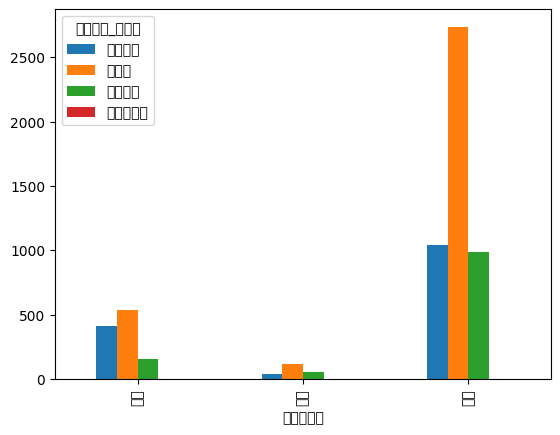

In [ ]:
d["사상자수"].plot(kind="bar") #사상자수 기준으로 막대차트로 시각화

<Axes: xlabel='발생지시도'>

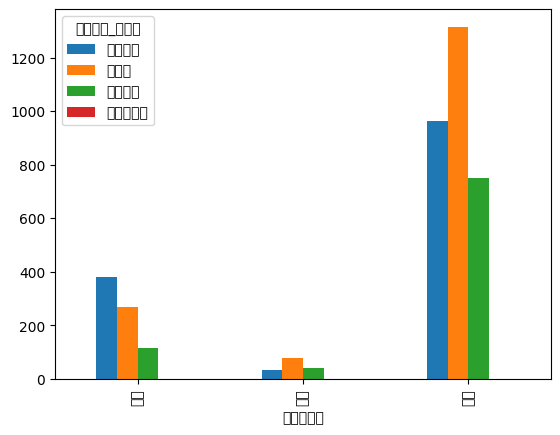

In [ ]:
d["사망자수"].plot(kind="bar") #사망자수 기준으로 막대차트로 시각화

<Axes: xlabel='발생지시도'>

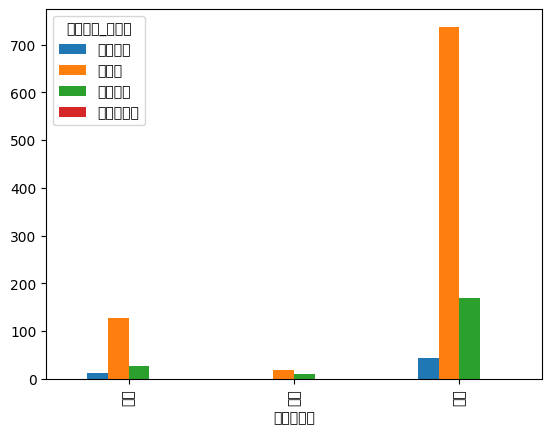

In [ ]:
d["중상자수"].plot(kind="bar") #중상자수 기준으로 막대차트로 시각화

<Axes: xlabel='발생지시도'>

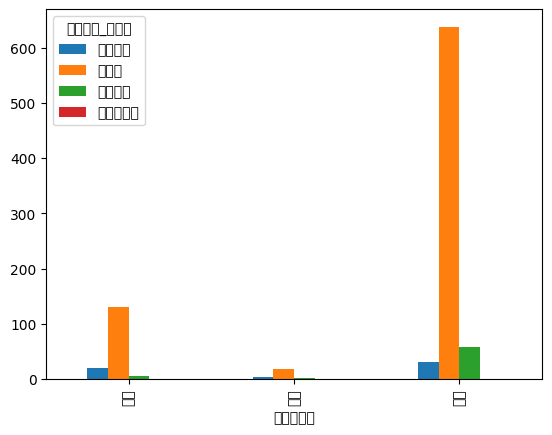

In [ ]:
d["경상자수"].plot(kind="bar") #경상자수 기준으로 막대차트로 시각화

# 9. 발생시간별 사상자수를 집계하고 시각화

<Axes: xlabel='발생시간'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missin

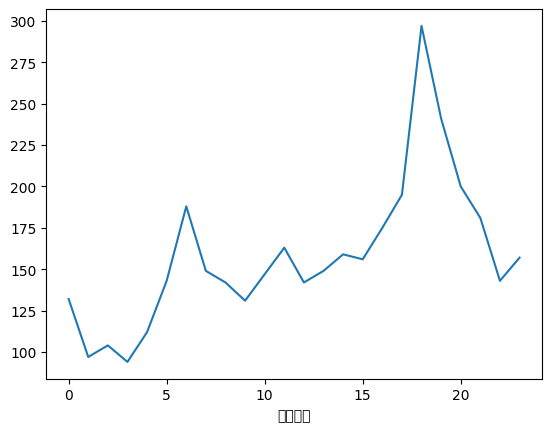

In [ ]:
df.groupby("발생시간")["사상자수"].count().plot() #발생시간별 사상자수를 집계하고 시각화

# 10. 발생년과 발생시간을 피벗팅하여 사상자수를 집계 후 시각화(sum)

In [ ]:
e= df.pivot_table(index="발생시간",columns="발생년", values="사상자수",aggfunc="sum")

e #발생년과 발생시간을 피벗팅하여 사상자수를 집계

발생년,2012,2013,2014,2015,2016,2017,2018,2019
발생시간,,,,,,,,
0,29,23,21,40,17,24,27,48
1,24,18,26,29,23,23,18,3
2,41,19,19,17,22,13,18,14
3,22,20,24,21,23,27,14,3
4,45,21,33,14,30,12,15,13
5,20,35,25,19,16,30,32,21
6,54,35,35,42,30,29,33,33
7,31,31,28,28,14,24,48,27
8,38,48,14,37,24,22,20,24


<Axes: xlabel='발생시간'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  

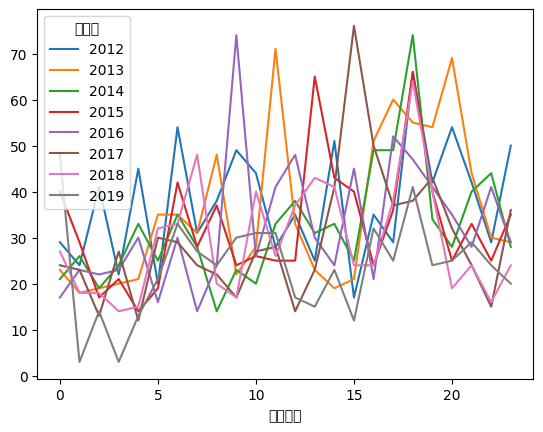

In [ ]:
e.plot() #발생년과 발생시간을 피벗팅하여 사상자수를 집꼐한 시각화

# 11. 발생년과 발생시간을 피벗팅하여 사상자수를 집계 후 시각화(count)

In [ ]:
f= df.pivot_table(index="발생시간",columns="발생년", values="사상자수",aggfunc="count")
f #발생년과 발생시간을 피벗팅하여 사상자수를 집꼐

발생년,2012,2013,2014,2015,2016,2017,2018,2019
발생시간,,,,,,,,
0,24,14,14,22,13,15,21,9
1,16,12,15,14,14,16,7,3
2,18,15,16,9,15,11,11,9
3,14,14,17,6,13,18,9,3
4,23,12,12,12,20,10,13,10
5,18,21,18,17,14,17,23,15
6,20,28,23,25,23,20,27,22
7,21,21,15,18,12,21,24,17
8,20,26,13,26,15,15,14,13


<Axes: xlabel='발생시간'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  

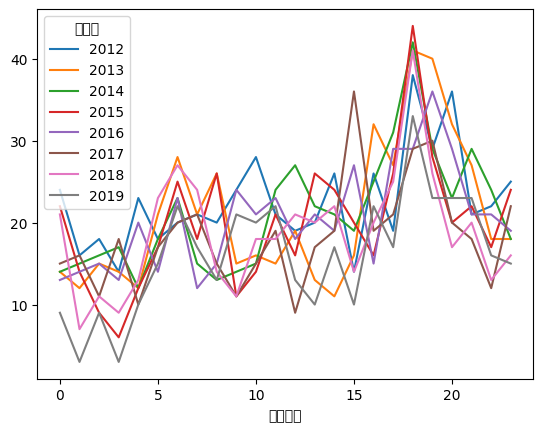

In [ ]:
f.plot()

# 12. folium을 이용하여 충남지역 발생년도에 따른 사고지역 알아보기

In [ ]:
pip install folium

In [ ]:
충남=df[df["발생지시도"]=="충남"]
충남.head() #데이터가 충남인것만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
0,2012,2012-01-01 08:00:00,주간,일,1,1,0,0,0,충남,청양군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,940016,1832833,126.830281,36.491268,NaN,NaN,1,8
1,2012,2012-01-01 04:00:00,야간,일,1,2,1,0,0,충남,서산시,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,911131,1861851,126.504460,36.750581,NaN,NaN,1,4
2,2012,2012-01-12 12:00:00,주간,목,1,1,0,0,0,충남,천안시,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,966331,1857321,127.123003,36.713312,NaN,NaN,1,12
3,2012,2012-01-03 02:00:00,야간,화,1,1,0,0,0,충남,태안군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,894123,1846409,126.316100,36.609656,NaN,NaN,1,2
4,2012,2012-01-05 07:00:00,주간,목,1,1,0,0,0,충남,천안시,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,981851,1862244,127.296666,36.758114,NaN,NaN,1,7


In [ ]:
충남_2019= 충남[충남["발생년"]==2019]
충남_2019.head() #발생년도가 2019년인 데이터만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
3411,2019,2019-01-02 15:00:00,주간,수,1,1,0,0,0,충남,서천군,차량단독,전도,전도,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,921337,1795200,126.625548,36.150677,NaN,NaN,1,15
3412,2019,2019-01-13 07:00:00,주간,일,1,1,0,0,0,충남,금산군,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,1006132,1782333,127.568069,36.037844,NaN,NaN,1,7
3414,2019,2019-01-21 18:00:00,야간,월,1,1,0,0,0,충남,금산군,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1001507,1781389,127.516727,36.029351,NaN,NaN,1,18
3415,2019,2019-01-03 20:00:00,야간,목,1,1,0,0,0,충남,공주시,차대차,정면충돌,정면충돌,신호위반,단일로,기타단일로,이륜차,화물차,966471,1834506,127.125569,36.507643,NaN,NaN,1,20
3416,2019,2019-02-11 20:00:00,야간,월,1,1,0,0,0,충남,금산군,차대사람,길가장자리구역통행중,길가장자리구역통행중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,998172,1792549,127.479684,36.129967,NaN,NaN,2,20


In [ ]:
import folium
maps_충남= folium.Map(location=(36.788453,127.212553),zoom_start=11) #각각 위도와 경도
maps_충남

In [ ]:
for lat,lng,volume in 충남_2019[["위도","경도","사상자수"]].values:
 folium.CircleMarker([lat,lng],radius=volume,color="red").add_to(maps_충남)
maps_충남 #2019년 충남 데이터 시각화, 사상자수에대한 시각화

# 13. folium을 이용하여 세종지역 발생년도에 따른 사고지역 알아보기

In [ ]:
세종=df[df["발생지시도"]=="세종"]
세종.head() #데이터가 충남인것만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
128,2012,2012-07-03 07:00:00,주간,화,1,2,1,0,0,세종,세종,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,기타/불명,기타/불명,승용차,없음,981548,1836927,127.293881,36.529878,NaN,NaN,7,7
130,2012,2012-07-04 02:00:00,야간,수,1,1,0,0,0,세종,세종,차대차,추돌,진행중 추돌,중앙선 침범,단일로,기타단일로,화물차,승용차,981288,1847166,127.290732,36.622174,NaN,NaN,7,2
139,2012,2012-07-14 05:00:00,야간,토,1,1,0,0,0,세종,세종,차대차,측면충돌,측면충돌,기타,교차로,교차로내,화물차,원동기장치자전거,984559,1838773,127.327480,36.546576,NaN,3593.0,7,5
140,2012,2012-07-14 03:00:00,야간,토,1,1,0,0,0,세종,세종,차대사람,기타,기타,안전운전 의무 불이행,교차로,교차로부근,승합차,보행자,982146,1844975,127.300374,36.602442,NaN,NaN,7,3
152,2012,2012-08-03 00:00:00,야간,금,1,1,0,0,0,세종,세종,차량단독,도로이탈,도로이탈 기타,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,982844,1841294,127.308260,36.569271,NaN,3593.0,8,0


In [ ]:
세종_2019= 세종[세종["발생년"]==2019]
세종_2019.head() #발생년도가 2019년인 데이터만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
3552,2019,2019-03-26 14:00:00,주간,화,1,1,0,0,0,세종,세종,차대차,측면충돌,측면충돌,교차로 통행방법 위반,교차로,교차로내,이륜차,화물차,979978,1841678,127.276219,36.572677,NaN,NaN,3,14
3562,2019,2019-03-31 20:00:00,야간,일,1,1,0,0,0,세종,세종,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,971140,1846617,127.177255,36.616975,NaN,NaN,3,20
3583,2019,2019-04-20 21:00:00,야간,토,1,1,0,0,0,세종,세종,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,이륜차,979649,1838593,127.272624,36.544858,NaN,NaN,4,21
3618,2019,2019-05-23 08:00:00,주간,목,2,2,0,0,0,세종,세종,차량단독,공작물충돌,공작물충돌,과속,단일로,고가도로위,승용차,없음,970988,1858358,127.175111,36.722813,NaN,NaN,5,8
3623,2019,2019-06-02 20:00:00,야간,일,1,1,0,0,0,세종,세종,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,자전거,없음,977210,1835960,127.245452,36.521067,NaN,NaN,6,20


In [ ]:
import folium
maps_세종= folium.Map(location=(36.520383,127.276174),zoom_start=11) #각각 위도와 경도
maps_세종

In [ ]:
for lat,lng,volume in 세종_2019[["위도","경도","사상자수"]].values:
 folium.CircleMarker([lat,lng],radius=volume,color="red").add_to(maps_세종)
maps_세종 #2019년 세종 데이터 시각화, 사상자수에대한 시각화

# 14. folium을 이용하여 대전지역 발생년도에 따른 사고지역 알아보기

In [ ]:
대전=df[df["발생지시도"]=="대전"]
대전.head() #데이터가 충남인것만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
31,2012,2012-01-06 23:00:00,야간,금,1,1,0,0,0,대전,유성구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,984319,1811420,127.325350,36.299975,NaN,NaN,1,23
36,2012,2012-02-16 14:00:00,주간,목,1,1,0,0,0,대전,대덕구,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,993846,1819579,127.431399,36.373640,NaN,NaN,2,14
52,2012,2012-01-20 06:00:00,주간,금,1,1,0,0,0,대전,동구,차대차,측면충돌,측면충돌,신호위반,교차로,교차로내,승합차,승합차,998207,1807794,127.480038,36.267410,NaN,NaN,1,6
53,2012,2012-01-28 00:00:00,야간,토,1,1,0,0,0,대전,대덕구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로내,승용차,보행자,993444,1817957,127.426926,36.359014,NaN,NaN,1,0
83,2012,2012-01-12 23:00:00,야간,목,1,2,1,0,0,대전,유성구,차대차,기타,기타,신호위반,교차로,교차로내,승용차,승용차,983691,1821101,127.318152,36.387242,NaN,NaN,1,23


In [ ]:
대전_2019= 대전[대전["발생년"]==2019]
대전_2019.head() #발생년도가 2019년인 데이터만 추출

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,Unnamed: 23,Unnamed: 24,발생월,발생시간
3413,2019,2019-01-01 19:00:00,야간,화,1,1,0,0,0,대전,서구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194,1817621,127.379560,36.355946,NaN,NaN,1,19
3435,2019,2019-01-07 18:00:00,야간,월,1,1,0,0,0,대전,중구,차대사람,횡단중,횡단중,안전운전 의무 불이행,교차로,교차로내,승합차,보행자,991972,1812502,127.410575,36.309824,NaN,NaN,1,18
3447,2019,2019-01-14 07:00:00,주간,월,1,1,0,0,0,대전,대덕구,차대차,기타,기타,신호위반,교차로,교차로부근,화물차,자전거,990556,1826775,127.394629,36.438487,NaN,NaN,1,7
3452,2019,2019-01-15 04:00:00,야간,화,1,1,0,0,0,대전,동구,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,994663,1814573,127.440536,36.328513,NaN,NaN,1,4
3472,2019,2019-01-24 21:00:00,야간,목,1,1,0,0,0,대전,대덕구,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,992948,1819982,127.421379,36.377267,NaN,NaN,1,21


In [ ]:
import folium
maps_대전= folium.Map(location=(36.327973,127.433507),zoom_start=11) #각각 위도와 경도
maps_대전

In [ ]:
for lat,lng,volume in 대전_2019[["위도","경도","사상자수"]].values:
 folium.CircleMarker([lat,lng],radius=volume,color="red").add_to(maps_대전)
maps_대전 #2019년 대전 데이터 시각화, 사상자수에대한 시각화